In [34]:
# k-NN on cifar-10
import pickle
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, LabelBinarizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
import itertools
%matplotlib notebook

# data_loading code from the official website
def load_cifar10_batch(cifar10_dataset_fold_path, batch_id):
    file = open(cifar10_dataset_fold_path + '/data_batch_' + str(batch_id), 'rb')
    batch = pickle.load(file, encoding='latin1')
    features = batch['data'].reshape(len(batch['data']), 3, 32, 32).transpose(0, 2, 3, 1)
    labels = batch['labels']
    file.close()
    return features, labels

# load training data
cifar10_dataset_fold_path = '/Users/dayao/Desktop/data_mining/final_project/cifar-10-batches-py'
X_train, y_train = load_cifar10_batch(cifar10_dataset_fold_path, 1)
for i in range(2, 6):
    features, labels = load_cifar10_batch(cifar10_dataset_fold_path, i)
    X_train = np.concatenate((X_train, features))
    y_train = np.concatenate((y_train, labels))
    
# load test data
file = open(cifar10_dataset_fold_path + '/test_batch', 'rb')
batch = pickle.load(file, encoding='latin1')
X_test = batch['data'].reshape(len(batch['data']), 3, 32, 32).transpose(0, 2, 3, 1)
y_test = batch['labels']
file.close()

# normalize the data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
minmax = MinMaxScaler()
X_train_temp = X_train.reshape(X_train.shape[0], 32 * 32 * 3)
X_test_temp = X_test.reshape(X_test.shape[0], 32 * 32 * 3)
X_train = minmax.fit_transform(X_train_temp)
X_test = minmax.fit_transform(X_test_temp)

# one-hot encode the labels
num_classes = 10
nums_class = []
for j in range(1, num_classes + 1):
    nums_class.append(j)
lb = LabelBinarizer().fit(nums_class)
y_train = lb.transform(y_train)
y_test = lb.transform(y_test)

# shuffle the data to make sure there are no underlying distributions
X_train, y_train = shuffle(X_train, y_train, random_state=624)
X_test, y_test = shuffle(X_test, y_test, random_state=624)

# split training data and validation data
# train_size = 0.75
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
#                                                   train_size = train_size,
#                                                   random_state = 7)

# # use cross-validation to find out the best K of K-NN
# List = list(range(3, 16))
# num_neighbors = filter(lambda x: x % 2 == 1, List) # filter out the odd ones
# cv_scores = []
# # perform 10-folf cross validation
# for k in num_neighbors:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     scores = cross_val_score(knn, X_train, y_train, scoring='accuracy', n_jobs=4, cv=10, verbose=1)
#     cv_scores.append(scores.mean())


The optimal number of neighbors is  3


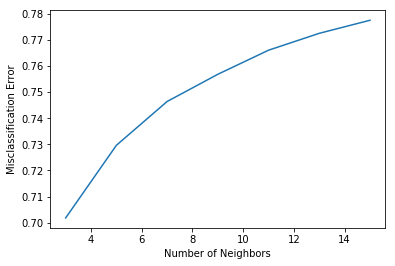

In [20]:
nums_neighbors = list(filter(lambda x: x % 2 == 1, List)) # filter out the odd ones, must transform the form of filter to list

# change to misclassification error
MSE = [1 - x for x in cv_scores]
# determine best k
optimal_k = nums_neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is ", optimal_k)

# plot misclassification error vs k
plt.plot(nums_neighbors, MSE)
plt.xlabel('Number of Neighbors')
plt.ylabel('Misclassification Error')
plt.show()

In [35]:
# build a random forest model based on the result of cross-validation
model = KNeighborsClassifier(n_neighbors=3, n_jobs=4)
print('---------start training---------')
model.fit(X_train, y_train)
print('---------stop training---------')

# score the model
predicts = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predicts))

---------start training---------
---------stop training---------
Accuracy: 0.2993


In [36]:
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#     classes = list(unique_labels(y_true, y_pred))
#     classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# print(y_test)
# y_test = y_test.values.argmax(axis=1)
# predicts = predicts.argmax(axis=1)

plot_confusion_matrix(y_test, predicts, classes=('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'), 
                      normalize=True, title=None)

plt.show()

ValueError: multilabel-indicator is not supported

In [28]:
# k-NN on cifar-10 without one-hot encoding
import pickle
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, LabelBinarizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
import itertools
%matplotlib notebook

# data_loading code from the official website
def load_cifar10_batch(cifar10_dataset_fold_path, batch_id):
    file = open(cifar10_dataset_fold_path + '/data_batch_' + str(batch_id), 'rb')
    batch = pickle.load(file, encoding='latin1')
    features = batch['data'].reshape(len(batch['data']), 3, 32, 32).transpose(0, 2, 3, 1)
    labels = batch['labels']
    file.close()
    return features, labels

# load training data
cifar10_dataset_fold_path = '/Users/dayao/Desktop/data_mining/final_project/cifar-10-batches-py'
X_train, y_train = load_cifar10_batch(cifar10_dataset_fold_path, 1)
for i in range(2, 6):
    features, labels = load_cifar10_batch(cifar10_dataset_fold_path, i)
    X_train = np.concatenate((X_train, features))
    y_train = np.concatenate((y_train, labels))
    
# load test data
file = open(cifar10_dataset_fold_path + '/test_batch', 'rb')
batch = pickle.load(file, encoding='latin1')
X_test = batch['data'].reshape(len(batch['data']), 3, 32, 32).transpose(0, 2, 3, 1)
y_test = batch['labels']
file.close()

# normalize the data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
minmax = MinMaxScaler()
X_train_temp = X_train.reshape(X_train.shape[0], 32 * 32 * 3)
X_test_temp = X_test.reshape(X_test.shape[0], 32 * 32 * 3)
X_train = minmax.fit_transform(X_train_temp)
X_test = minmax.fit_transform(X_test_temp)

print(y_test)

# # one-hot encode the labels
# num_classes = 10
# nums_class = []
# for j in range(1, num_classes + 1):
#     nums_class.append(j)
# lb = LabelBinarizer().fit(nums_class)
# y_train = lb.transform(y_train)
# y_test = lb.transform(y_test)

# shuffle the data to make sure there are no underlying distributions
X_train, y_train = shuffle(X_train, y_train, random_state=624)
X_test, y_test = shuffle(X_test, y_test, random_state=624)

# split training data and validation data
# train_size = 0.75
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
#                                                   train_size = train_size,
#                                                   random_state = 7)

# # use cross-validation to find out the best K of K-NN
# List = list(range(3, 16))
# num_neighbors = filter(lambda x: x % 2 == 1, List) # filter out the odd ones
# cv_scores = []
# # perform 10-folf cross validation
# for k in num_neighbors:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     scores = cross_val_score(knn, X_train, y_train, scoring='accuracy', n_jobs=4, cv=10, verbose=1)
#     cv_scores.append(scores.mean())

[3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9, 5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6, 0, 9, 3, 9, 7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3, 6, 2, 1, 2, 3, 7, 2, 6, 8, 8, 0, 2, 9, 3, 3, 8, 8, 1, 1, 7, 2, 5, 2, 7, 8, 9, 0, 3, 8, 6, 4, 6, 6, 0, 0, 7, 4, 5, 6, 3, 1, 1, 3, 6, 8, 7, 4, 0, 6, 2, 1, 3, 0, 4, 2, 7, 8, 3, 1, 2, 8, 0, 8, 3, 5, 2, 4, 1, 8, 9, 1, 2, 9, 7, 2, 9, 6, 5, 6, 3, 8, 7, 6, 2, 5, 2, 8, 9, 6, 0, 0, 5, 2, 9, 5, 4, 2, 1, 6, 6, 8, 4, 8, 4, 5, 0, 9, 9, 9, 8, 9, 9, 3, 7, 5, 0, 0, 5, 2, 2, 3, 8, 6, 3, 4, 0, 5, 8, 0, 1, 7, 2, 8, 8, 7, 8, 5, 1, 8, 7, 1, 3, 0, 5, 7, 9, 7, 4, 5, 9, 8, 0, 7, 9, 8, 2, 7, 6, 9, 4, 3, 9, 6, 4, 7, 6, 5, 1, 5, 8, 8, 0, 4, 0, 5, 5, 1, 1, 8, 9, 0, 3, 1, 9, 2, 2, 5, 3, 9, 9, 4, 0, 3, 0, 0, 9, 8, 1, 5, 7, 0, 8, 2, 4, 7, 0, 2, 3, 6, 3, 8, 5, 0, 3, 4, 3, 9, 0, 6, 1, 0, 9, 1, 0, 7, 9, 1, 2, 6, 9, 3, 4, 6, 0, 0, 6, 6, 6, 3, 2, 6, 1, 8, 2, 1, 6, 8, 6, 8, 0, 4, 0, 7, 7, 5, 5, 3, 5, 2, 3, 4, 1, 7, 5, 4, 6, 1, 9, 3, 

In [23]:
# build a random forest model based on the result of cross-validation
model = KNeighborsClassifier(n_neighbors=3, n_jobs=4)
print('---------start training---------')
model.fit(X_train, y_train)
print('---------stop training---------')

# score the model
predicts = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predicts)) 

---------start training---------
---------stop training---------
Accuracy: 0.3303


Normalized confusion matrix


<IPython.core.display.Javascript object>


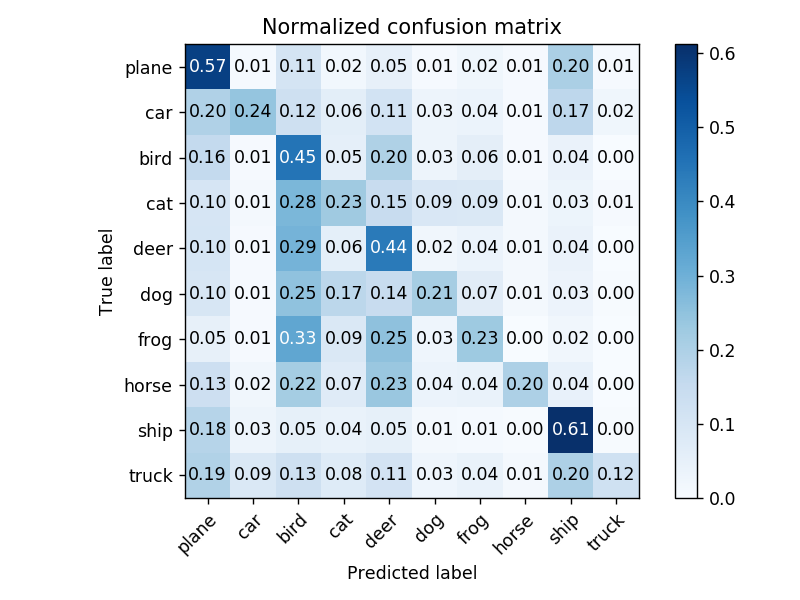

In [32]:
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#     classes = list(unique_labels(y_true, y_pred))
#     classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# print(y_test)
# y_test = y_test.values.argmax(axis=1)
# predicts = predicts.argmax(axis=1)

plot_confusion_matrix(y_test, predicts, classes=('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'), 
                      normalize=True, title=None)

plt.show()

In [38]:
# k-NN on cifar-10 without one-hot encoding and after PCA
import pickle
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, LabelBinarizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
import itertools
%matplotlib notebook

# data_loading code from the official website
def load_cifar10_batch(cifar10_dataset_fold_path, batch_id):
    file = open(cifar10_dataset_fold_path + '/data_batch_' + str(batch_id), 'rb')
    batch = pickle.load(file, encoding='latin1')
    features = batch['data'].reshape(len(batch['data']), 3, 32, 32).transpose(0, 2, 3, 1)
    labels = batch['labels']
    file.close()
    return features, labels

# load training data
cifar10_dataset_fold_path = '/Users/dayao/Desktop/data_mining/final_project/cifar-10-batches-py'
X_train, y_train = load_cifar10_batch(cifar10_dataset_fold_path, 1)
for i in range(2, 6):
    features, labels = load_cifar10_batch(cifar10_dataset_fold_path, i)
    X_train = np.concatenate((X_train, features))
    y_train = np.concatenate((y_train, labels))
    
# load test data
file = open(cifar10_dataset_fold_path + '/test_batch', 'rb')
batch = pickle.load(file, encoding='latin1')
X_test = batch['data'].reshape(len(batch['data']), 3, 32, 32).transpose(0, 2, 3, 1)
y_test = batch['labels']
file.close()

# normalize the data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
minmax = MinMaxScaler()
X_train_temp = X_train.reshape(X_train.shape[0], 32 * 32 * 3)
X_test_temp = X_test.reshape(X_test.shape[0], 32 * 32 * 3)
X_train_HD = minmax.fit_transform(X_train_temp)
X_test_HD = minmax.fit_transform(X_test_temp)

# do the PCA, based on the figures, we choose 600 to be the number of components
pca = PCA(n_components=500)
X_train = pca.fit_transform(X_train_HD)
X_test = pca.transform(X_test_HD)


# # one-hot encode the labels
# num_classes = 10
# nums_class = []
# for j in range(1, num_classes + 1):
#     nums_class.append(j)
# lb = LabelBinarizer().fit(nums_class)
# y_train = lb.transform(y_train)
# y_test = lb.transform(y_test)

# shuffle the data to make sure there are no underlying distributions
X_train, y_train = shuffle(X_train, y_train, random_state=624)
X_test, y_test = shuffle(X_test, y_test, random_state=624)

# split training data and validation data
# train_size = 0.75
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
#                                                   train_size = train_size,
#                                                   random_state = 7)

# # use cross-validation to find out the best K of K-NN
# List = list(range(3, 16))
# num_neighbors = filter(lambda x: x % 2 == 1, List) # filter out the odd ones
# cv_scores = []
# # perform 10-folf cross validation
# for k in num_neighbors:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     scores = cross_val_score(knn, X_train, y_train, scoring='accuracy', n_jobs=4, cv=10, verbose=1)
#     cv_scores.append(scores.mean())

In [39]:
# build a random forest model based on the result of cross-validation
model = KNeighborsClassifier(n_neighbors=3, n_jobs=4)
print('---------start training---------')
model.fit(X_train, y_train)
print('---------stop training---------')

# score the model
predicts = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predicts)) 

---------start training---------
---------stop training---------
Accuracy: 0.3369


Normalized confusion matrix


<IPython.core.display.Javascript object>


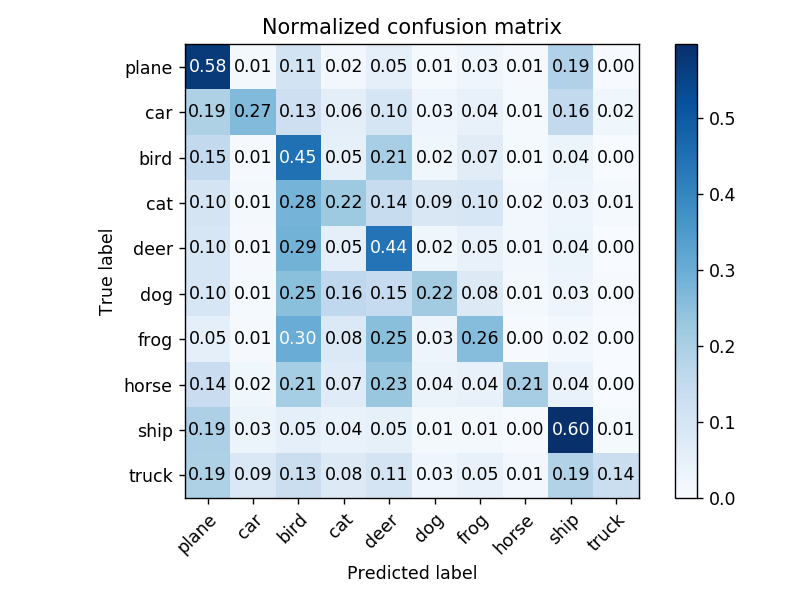

In [40]:
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#     classes = list(unique_labels(y_true, y_pred))
#     classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# print(y_test)
# y_test = y_test.values.argmax(axis=1)
# predicts = predicts.argmax(axis=1)

plot_confusion_matrix(y_test, predicts, classes=('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'), 
                      normalize=True, title=None)

plt.show()